In [1]:
from utils import *

In [2]:
video_path = '/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/video/2.mp4'
video = read_video_to_tensor(video_path, frame_step=5)

In [3]:
print(f"Video shape: {video.shape}")

Video shape: torch.Size([109, 3, 1080, 1920])


In [4]:
highlighted_pictures = []
marker_list = []

markers, highlighted_frame = heuristic_marker_highlight_for_first_frame(video[0], threshold=0.5, picture=True)
highlighted_pictures.append(highlighted_frame)
marker_list.append(markers)

5977 Black Pixels,  73 Segments.


In [5]:
for i in range(video.shape[0]-1):
    markers, highlighted_frame = marker_highlight(video[i], previous_marker=marker_list[-1], threshold=0.5, picture=True)
    highlighted_pictures.append(highlighted_frame)
    marker_list.append(markers)

/home/ubuntu/SML/SIGMAxPortal301-Team2/심화과제_1/SML/utils.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  marker[key] = torch.mean(torch.tensor(segments[key]).to(dtype=torch.float32), dim=0)


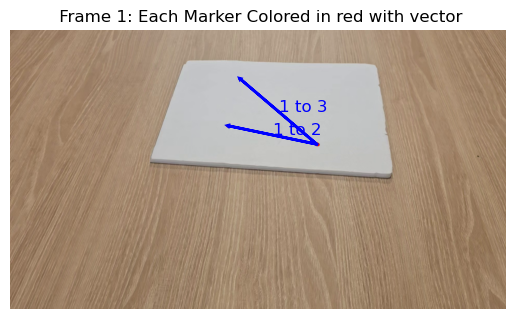

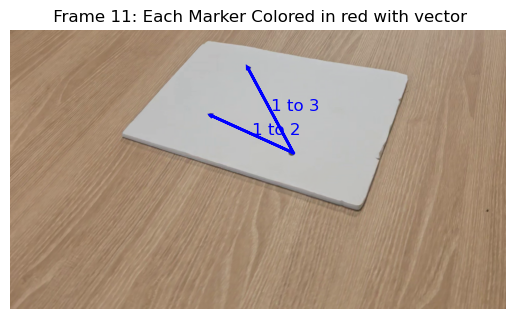

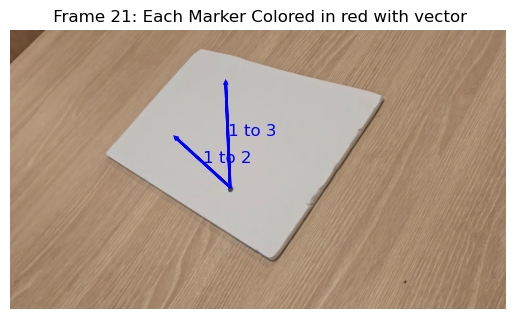

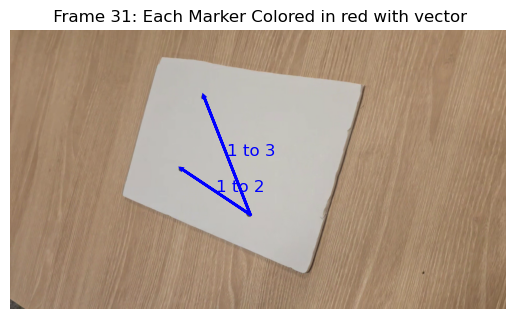

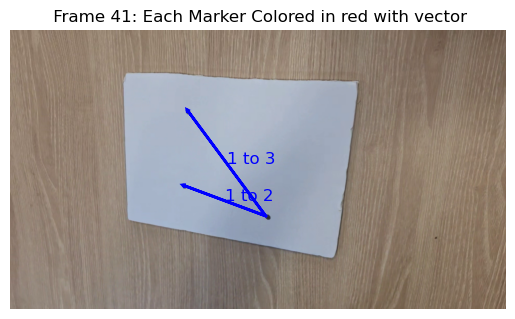

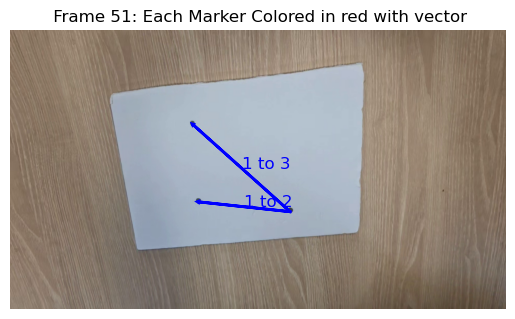

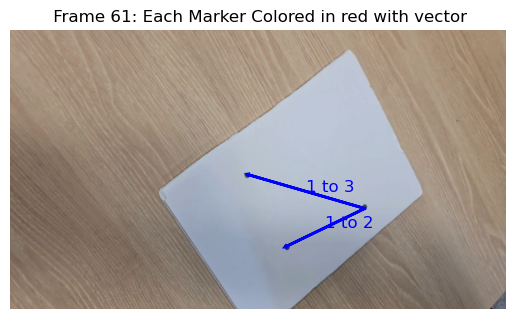

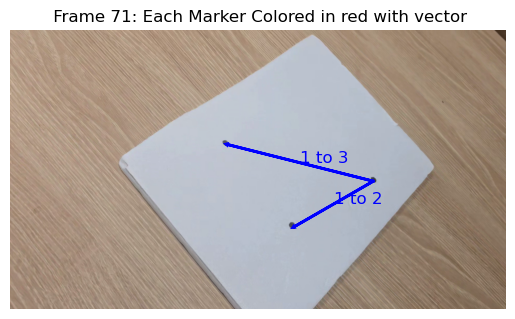

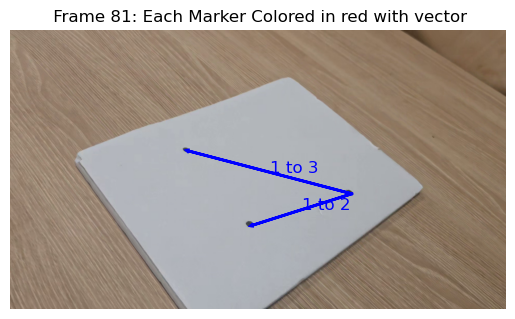

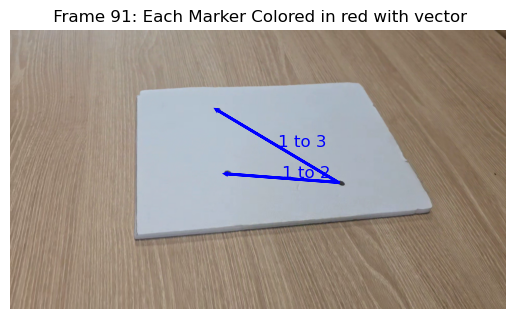

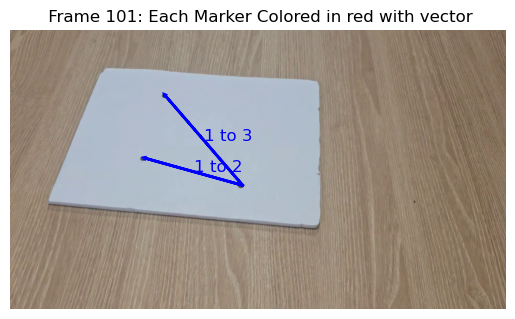

In [ ]:
for i in range(0, len(highlighted_pictures), 10):
    show_picture_with_marker_vector(highlighted_pictures[i], marker_list[i], title=f' Frame {i+1}: Each Marker Colored in red with vector')